In [1]:
## Telco Customer Churn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [7]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
! ls

## Missing Values- Feature Engineering.ipynb
Feature Encoding .ipynb
Outliers.ipynb
README.md
Telco Customer Churn 1.ipynb
Telco Customer Churn.ipynb
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
WA_Fn-UseC_-HR-Employee-Attrition.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
loan.csv
mercedes.csv
mobile_dataset.csv
monthly-milk-production-pounds.csv
test.csv
titanic.csv
train.csv


In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape

(7043, 21)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    return summary

In [15]:
resumetable(df)

Dataset Shape: (7043, 19)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,gender,object,0,2,Female,Male,Male
1,SeniorCitizen,int64,0,2,0,0,0
2,Partner,object,0,2,Yes,No,No
3,Dependents,object,0,2,No,No,No
4,tenure,int64,0,73,1,34,2
5,PhoneService,object,0,2,No,Yes,Yes
6,MultipleLines,object,0,3,No phone service,No,No
7,InternetService,object,0,3,DSL,DSL,DSL
8,OnlineSecurity,object,0,3,No,Yes,Yes
9,OnlineBackup,object,0,3,Yes,No,Yes


In [14]:
df.drop(['customerID', 'TotalCharges'], axis=1, inplace=True)

In [17]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

df.Churn = labelEncoder.fit_transform(df.Churn.values.ravel())

In [19]:
df.Churn.unique()

array([0, 1])

In [20]:
df.Churn.mean()

0.2653698707936959

In [22]:
data = [go.Bar(
        x = df["Churn"].value_counts().index.values, 
        y = df["Churn"].value_counts().values

)]

py.iplot(data , filename='basic-bar')

In [28]:
data = df.copy()

In [29]:

def plot_pie(var_select) :
    
    attrition = data[(data['Churn'] != 0)]
    no_attrition = data[(data['Churn'] == 0)]
    
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    
    
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customer",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    
    
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non Churn Customer" )
    

    layout = go.Layout(dict(title = var_select + " distribution in Customer Churn ",
                            annotations = [dict(text = "Yes_Churn",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_Churn",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [27]:
resumetable(df)

Dataset Shape: (7043, 19)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,gender,object,0,2,Female,Male,Male
1,SeniorCitizen,int64,0,2,0,0,0
2,Partner,object,0,2,Yes,No,No
3,Dependents,object,0,2,No,No,No
4,tenure,int64,0,73,1,34,2
5,PhoneService,object,0,2,No,Yes,Yes
6,MultipleLines,object,0,3,No phone service,No,No
7,InternetService,object,0,3,DSL,DSL,DSL
8,OnlineSecurity,object,0,3,No,Yes,Yes
9,OnlineBackup,object,0,3,Yes,No,Yes


In [30]:
plot_pie('gender')

In [31]:
plot_pie('Partner')

In [32]:
plot_pie('PaymentMethod')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


In [34]:
resumetable(df)

Dataset Shape: (7043, 19)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,gender,object,0,2,Female,Male,Male
1,SeniorCitizen,int64,0,2,0,0,0
2,Partner,object,0,2,Yes,No,No
3,Dependents,object,0,2,No,No,No
4,tenure,int64,0,73,1,34,2
5,PhoneService,object,0,2,No,Yes,Yes
6,MultipleLines,object,0,3,No phone service,No,No
7,InternetService,object,0,3,DSL,DSL,DSL
8,OnlineSecurity,object,0,3,No,Yes,Yes
9,OnlineBackup,object,0,3,Yes,No,Yes


In [ ]:
tenure
MonthlyCharges

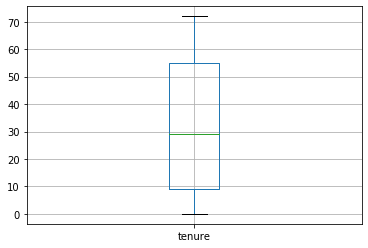

In [35]:
fig = df.boxplot(column="tenure")

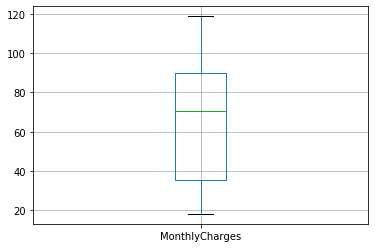

In [36]:
fig = df.boxplot(column="MonthlyCharges")

In [48]:
target_raw = df["Churn"]
features_raw = df.drop('Churn' , axis=1)

In [49]:
from sklearn.preprocessing import MinMaxScaler

features_log_transformed  =pd.DataFrame(data = features_raw )

scaler = MinMaxScaler()
numriacl = ['tenure','MonthlyCharges']
features_log_minmax_transformed = pd.DataFrame(data = features_log_transformed )
features_log_minmax_transformed[numriacl] = scaler.fit_transform(features_log_transformed[numriacl])

display(features_log_minmax_transformed.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891


In [50]:
features_log_minmax_transformed.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,0.449599,0.462803
std,0.368612,0.341104,0.299403
min,0.000000,0.000000,0.000000
25%,0.000000,0.125000,0.171642
50%,0.000000,0.402778,0.518408
75%,0.000000,0.763889,0.712438
max,1.000000,1.000000,1.000000


In [51]:
resumetable(features_raw)

Dataset Shape: (7043, 18)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,gender,object,0,2,Female,Male,Male
1,SeniorCitizen,int64,0,2,0,0,0
2,Partner,object,0,2,Yes,No,No
3,Dependents,object,0,2,No,No,No
4,tenure,float64,0,73,0.0138889,0.472222,0.0277778
5,PhoneService,object,0,2,No,Yes,Yes
6,MultipleLines,object,0,3,No phone service,No,No
7,InternetService,object,0,3,DSL,DSL,DSL
8,OnlineSecurity,object,0,3,No,Yes,Yes
9,OnlineBackup,object,0,3,Yes,No,Yes


In [54]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

features_raw["gender"] = labelEncoder.fit_transform(features_raw[["gender"]].values.ravel())
features_raw["Partner"] = labelEncoder.fit_transform(features_raw[["Partner"]].values.ravel())
features_raw["Dependents"] = labelEncoder.fit_transform(features_raw[["Dependents"]].values.ravel())
features_raw["PhoneService"] = labelEncoder.fit_transform(features_raw[["PhoneService"]].values.ravel())
features_raw["PaperlessBilling"] = labelEncoder.fit_transform(features_raw[["PaperlessBilling"]].values.ravel())


In [55]:
resumetable(features_raw)

Dataset Shape: (7043, 18)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,gender,int64,0,2,0,1,1
1,SeniorCitizen,int64,0,2,0,0,0
2,Partner,int64,0,2,1,0,0
3,Dependents,int64,0,2,1,0,0
4,tenure,float64,0,73,0.0138889,0.472222,0.0277778
5,PhoneService,int64,0,2,1,0,0
6,MultipleLines,object,0,3,No phone service,No,No
7,InternetService,object,0,3,DSL,DSL,DSL
8,OnlineSecurity,object,0,3,No,Yes,Yes
9,OnlineBackup,object,0,3,Yes,No,Yes


In [56]:
features_raw = pd.get_dummies(columns=["MultipleLines", 
                                    "InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection",
                                    "TechSupport", "StreamingTV","StreamingMovies","Contract","PaymentMethod"], data=features_raw, drop_first=True)

In [57]:
features_raw.shape

(7043, 29)

In [ ]:
## bulid model 

In [58]:
 # Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    target_raw, 
                                                    test_size = 0.20, 
                                                    random_state = 0)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5634 samples.
Testing set has 1409 samples.


In [60]:
y_train.value_counts()

0    4133
1    1501
Name: Churn, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(sampling_strategy='minority',random_state=0)
smote_train, smote_target = oversampler.fit_sample(X_train,y_train)

In [63]:
smote_target.value_counts()

1    4133
0    4133
Name: Churn, dtype: int64

In [64]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(smote_train, smote_target)

In [65]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7374024130589071


In [66]:
features_raw.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [68]:
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

AxesSubplot(0.125,0.125;0.775x0.755)


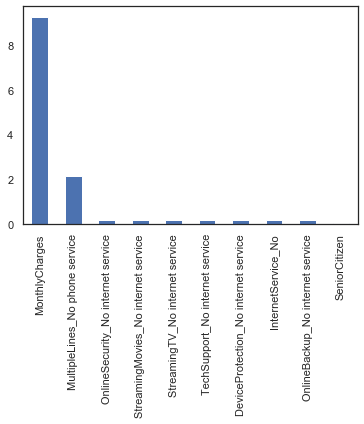

In [69]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=features_raw.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


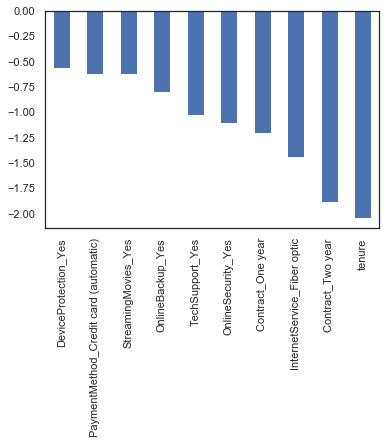

In [71]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [72]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(smote_train,smote_target)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7224982256919801

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(smote_train, smote_target)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7494677075940384

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}
# A sample parameter
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)

clf.fit(smote_train, smote_target)
#converting the clf.cv_results to dataframe
df=pd.DataFrame.from_dict(clf.cv_results_)
#here Possible inputs for cross validation is cv=2, there two split split0 and split1
df[['split0_test_accuracy','split1_test_accuracy','split0_test_precision','split1_test_precision','split0_test_recall','split1_test_recall']]